# Bundestag Stammdaten ML 
TODO: Erklärung wo der Datensatz her kommt
TODO: Zielsetzung

In [2]:
# space for imports
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## 1) Load data
### API request

In [3]:
import requests

url = "https://search.dip.bundestag.de/api/v1/person?apikey=rgsaY4U.oZRQKUHdJhF9qguHMkwCGIoLaqEcaHjYLF"
resp = requests.get(url)
data = resp.json()


In [4]:
list(data.values())[1]

[{'id': '2232',
  'nachname': 'Jongen',
  'vorname': 'Marc',
  'typ': 'Person',
  'wahlperiode': 19,
  'aktualisiert': '2022-07-26T19:57:10+02:00',
  'titel': 'Dr. Marc Jongen, MdB, AfD',
  'datum': '2024-05-17',
  'basisdatum': '2017-12-07'},
 {'id': '2177',
  'nachname': 'Frömming',
  'vorname': 'Götz',
  'typ': 'Person',
  'wahlperiode': 19,
  'aktualisiert': '2022-07-26T19:57:10+02:00',
  'titel': 'Dr. Götz Frömming, MdB, AfD',
  'datum': '2024-05-17',
  'basisdatum': '2017-11-22'},
 {'id': '2151',
  'nachname': 'Storch',
  'vorname': 'Beatrix',
  'namenszusatz': 'von',
  'typ': 'Person',
  'wahlperiode': 19,
  'aktualisiert': '2022-07-26T19:57:10+02:00',
  'titel': 'Beatrix von Storch, MdB, AfD',
  'datum': '2024-05-17',
  'basisdatum': '2017-11-10'},
 {'id': '2059',
  'nachname': 'Baumann',
  'vorname': 'Bernd',
  'typ': 'Person',
  'wahlperiode': 19,
  'aktualisiert': '2022-07-26T19:57:10+02:00',
  'titel': 'Dr. Bernd Baumann, MdB, AfD',
  'datum': '2024-05-17',
  'basisdatum': 

In [5]:
json = pd.DataFrame.from_dict(list(data.values())[1]) 

In [6]:
json.head()

,id,nachname,vorname,typ,wahlperiode,aktualisiert,titel,datum,basisdatum,namenszusatz,person_roles
0,2232,Jongen,Marc,Person,19,2022-07-26T19:57:10+02:00,"Dr. Marc Jongen, MdB, AfD",2024-05-17,2017-12-07,NaN,NaN
1,2177,Frömming,Götz,Person,19,2022-07-26T19:57:10+02:00,"Dr. Götz Frömming, MdB, AfD",2024-05-17,2017-11-22,NaN,NaN
2,2151,Storch,Beatrix,Person,19,2022-07-26T19:57:10+02:00,"Beatrix von Storch, MdB, AfD",2024-05-17,2017-11-10,von,NaN
3,2059,Baumann,Bernd,Person,19,2022-07-26T19:57:10+02:00,"Dr. Bernd Baumann, MdB, AfD",2024-05-17,2017-10-24,NaN,NaN
4,2056,Renner,Martin Erwin,Person,19,2022-07-26T19:57:10+02:00,"Martin Erwin Renner, MdB, AfD",2024-05-17,2018-01-30,NaN,NaN


In [7]:
json.info()
json.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            100 non-null    object
 1   nachname      100 non-null    object
 2   vorname       100 non-null    object
 3   typ           100 non-null    object
 4   wahlperiode   100 non-null    int64 
 5   aktualisiert  100 non-null    object
 6   titel         100 non-null    object
 7   datum         100 non-null    object
 8   basisdatum    100 non-null    object
 9   namenszusatz  2 non-null      object
 10  person_roles  46 non-null     object
dtypes: int64(1), object(10)
memory usage: 8.7+ KB


,wahlperiode
count,100.000000
mean,18.600000
std,1.651446
min,13.000000
25%,17.750000
50%,19.000000
75%,20.000000
max,20.000000


### XML File

In [14]:
#filepath = "C:\\Dev\\uni\\malrn\\project\\data\\MdB-Stammdaten\\MDB_STAMMDATEN.XML"
filepath = 'data/MdB-Stammdaten/MDB_STAMMDATEN.XML'
mdb_name = pd.read_xml(filepath, parser="lxml", xpath="//NAME")
mdb_biographics = pd.read_xml(filepath, parser="lxml", xpath="//BIOGRAFISCHE_ANGABEN")
mdb_election_period = pd.read_xml(filepath, parser="lxml", xpath="//WAHLPERIODE")
mdb = pd.read_xml(filepath, parser="lxml", xpath="//MDB")

# MDB --> Namen, Biografischen Angaben, Wahlperioden[] --> all objects

ImportError: lxml not found, please install or use the etree parser.

In [ ]:
mdb.head()

,ID,NAMEN,BIOGRAFISCHE_ANGABEN,WAHLPERIODEN
0,11000001,\n,\n,\n
1,11000002,\n,\n,\n
2,11000003,\n,\n,\n
3,11000004,\n,\n,\n
4,11000005,\n,\n,\n


In [ ]:
mdb.info()
mdb_name.info()
mdb_biographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4379 entries, 0 to 4378
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    4379 non-null   int64 
 1   NAMEN                 4379 non-null   object
 2   BIOGRAFISCHE_ANGABEN  4379 non-null   object
 3   WAHLPERIODEN          4379 non-null   object
dtypes: int64(1), object(3)
memory usage: 137.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4660 entries, 0 to 4659
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NACHNAME      4660 non-null   object
 1   VORNAME       4660 non-null   object
 2   ORTSZUSATZ    637 non-null    object
 3   ADEL          41 non-null     object
 4   PRAEFIX       86 non-null     object
 5   ANREDE_TITEL  1130 non-null   object
 6   AKAD_TITEL    1163 non-null   object
 7   HISTORIE_VON  4659 non-null   object
 8   HISTORIE_BI

**Because of the structure of the data, `pd.read_xml` does not return any valuable data**

### CSV

In [13]:
mdb_csv = pd.read_csv('data/mdb_data.csv',sep=";", encoding="latin-1")

## 2) First overview of the data and the data structure

In [15]:
mdb_csv.head()

,id,title,first_name,last_name,full_name,gender,date_birth,place_birth,country_birth,date_death,religion,family_stat,occupation,party,time,legislature,elect_distr,faction,mandate_type
0,1,Dr.,Manfred,Abelein,Dr. Manfred Abelein,mï¿½nnlich,20.10.1930,Stuttgart,NaN,17.01.2008,katholisch,keine Angaben,"Rechtsanwalt, Wirtschaftsprï¿½fer, Universitï¿...",CDU,1,5,174.0,Fraktion der Christlich Demokratischen Union/C...,Direktwahl
1,2,Dr.,Ernst,Achenbach,Dr. Ernst Achenbach,mï¿½nnlich,09.04.1909,Siegen,NaN,02.12.1991,evangelisch,"verheiratet, 3 Kinder",Rechtsanwalt und Notar,FDP,1,3,NaN,Fraktion der Freien Demokratischen Partei,Landesliste
2,3,NaN,Annemarie,Ackermann,Annemarie Ackermann,weiblich,26.05.1913,Parabutsch,Jugoslawien,18.02.1994,katholisch,"verheiratet, 5 Kinder",Hilfsreferentin,CDU,1,2,NaN,Fraktion der Christlich Demokratischen Union/C...,Landesliste
3,4,Dr.,Else,Ackermann,Dr. Else Ackermann,weiblich,06.11.1933,Berlin,NaN,14.09.2019,evangelisch,ledig,ï¿½rztin,CDU,1,11,NaN,Fraktion der Christlich Demokratischen Union/C...,Volkskammer
4,5,NaN,Ulrich,Adam,Ulrich Adam,mï¿½nnlich,09.06.1950,"Teterow, Kr. Teterow, Bezirk Neubrandenburg",NaN,NaN,evangelisch,"verheiratet, 2 Kinder","Mathematiker, Geschï¿½ftsfï¿½hrer",CDU,1,12,268.0,Fraktion der Christlich Demokratischen Union/C...,Direktwahl


In [16]:
mdb_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11618 entries, 0 to 11617
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11618 non-null  int64  
 1   title          3061 non-null   object 
 2   first_name     11618 non-null  object 
 3   last_name      11618 non-null  object 
 4   full_name      11618 non-null  object 
 5   gender         11618 non-null  object 
 6   date_birth     11618 non-null  object 
 7   place_birth    11614 non-null  object 
 8   country_birth  213 non-null    object 
 9   date_death     5411 non-null   object 
 10  religion       11192 non-null  object 
 11  family_stat    11463 non-null  object 
 12  occupation     11618 non-null  object 
 13  party          11613 non-null  object 
 14  time           11618 non-null  int64  
 15  legislature    11618 non-null  int64  
 16  elect_distr    5970 non-null   float64
 17  faction        11618 non-null  object 
 18  mandat

There are multiple columns with null values. <br>
Values in columns like `place_birth`, `party` and `mandate_type`, where just a couple are missing, could be filled by researching the parliament member.

In [17]:
mdb_csv.describe()

,id,time,legislature,elect_distr
count,11618.000000,11618.000000,11618.000000,5970.000000
mean,8286.502066,2.571355,10.507058,134.130151
std,6889.965642,1.707634,5.433358,86.298410
min,1.000000,1.000000,1.000000,1.000000
25%,2905.250000,1.000000,6.000000,56.000000
50%,6562.500000,2.000000,11.000000,130.000000
75%,11663.500000,3.000000,15.000000,204.000000
max,50933.000000,13.000000,19.000000,328.000000


### Missing values in place_birth, party and mandate_type

In [18]:
mdb_csv[mdb_csv['place_birth'].isnull()]

,id,title,first_name,last_name,full_name,gender,date_birth,place_birth,country_birth,date_death,religion,family_stat,occupation,party,time,legislature,elect_distr,faction,mandate_type
3357,3358,NaN,Patrick,Kurth,Patrick Kurth,mï¿½nnlich,06.10.1976,NaN,NaN,NaN,ohne Angaben,2 Kinder,Politikwissenschaftler M. A.,FDP,1,16,NaN,Fraktion der Freien Demokratischen Partei,Landesliste
3564,3565,NaN,Annette,Sawade,Annette Sawade,weiblich,23.04.1953,NaN,NaN,NaN,evangelisch,"verheiratet, 3 Kinder",Diplom-Chemikerin,SPD,1,17,NaN,Fraktion der Sozialdemokratischen Partei Deuts...,Landesliste
6500,7442,NaN,Patrick,Kurth,Patrick Kurth,mï¿½nnlich,06.10.1976,NaN,NaN,NaN,ohne Angaben,2 Kinder,Politikwissenschaftler M. A.,FDP,2,17,NaN,Fraktion der Freien Demokratischen Partei,Landesliste
6650,7649,NaN,Annette,Sawade,Annette Sawade,weiblich,23.04.1953,NaN,NaN,NaN,evangelisch,"verheiratet, 3 Kinder",Diplom-Chemikerin,SPD,2,18,NaN,Fraktion der Sozialdemokratischen Partei Deuts...,Landesliste


There are only four values in the data set without any birth place. <br>
After a quick google search this value can be filled with `Sondershausen` in Patrick Kurth's case and with `Nordhausen` in Annette Sawade's case.

In [19]:
mdb_csv[mdb_csv['party'].isnull()]

,id,title,first_name,last_name,full_name,gender,date_birth,place_birth,country_birth,date_death,religion,family_stat,occupation,party,time,legislature,elect_distr,faction,mandate_type
574,575,NaN,Alfred,Frenzel,Alfred Frenzel,mï¿½nnlich,18.09.1899,Josefsthal,NaN,23.07.1968,ohne Angaben,keine Angaben,Glasschmelzer,NaN,1,2,NaN,Fraktion der Sozialdemokratischen Partei Deuts...,Landesliste
1322,1323,Dr.,Heinrich,Leuchtgens,Dr. Heinrich Leuchtgens,mï¿½nnlich,31.10.1876,Birklar,NaN,21.03.1959,ohne Angaben,keine Angaben,"Lehrer, Volkswirt",NaN,1,1,NaN,Fraktion der Freien Demokratischen Partei,Landesliste
2054,2055,Dr.,Helmuth,Schranz,Dr. Helmuth Schranz,mï¿½nnlich,07.01.1897,Haiger,NaN,07.05.1968,ohne Angaben,"verheiratet, 4 Kinder",Prokurist,NaN,1,2,NaN,Fraktion Deutsche Partei,Landesliste
4481,4659,NaN,Alfred,Frenzel,Alfred Frenzel,mï¿½nnlich,18.09.1899,Josefsthal,NaN,23.07.1968,ohne Angaben,keine Angaben,Glasschmelzer,NaN,2,3,NaN,Fraktion der Sozialdemokratischen Partei Deuts...,Landesliste
5510,6139,Dr.,Helmuth,Schranz,Dr. Helmuth Schranz,mï¿½nnlich,07.01.1897,Haiger,NaN,07.05.1968,ohne Angaben,"verheiratet, 4 Kinder",Prokurist,NaN,2,3,NaN,Fraktion Deutsche Partei,Landesliste


According to Wikipedia Alfred Frenzel was a member of the SPD, Dr. Heinrich Leuchtgens was a member of his own party the NDP and Dr. Helmuth Schranz was a member of the DP.

In [20]:
mdb_csv[mdb_csv['mandate_type'].isnull()]

,id,title,first_name,last_name,full_name,gender,date_birth,place_birth,country_birth,date_death,religion,family_stat,occupation,party,time,legislature,elect_distr,faction,mandate_type
5969,6771,NaN,Werner,Kuhn,Werner Kuhn,mï¿½nnlich,19.05.1955,Zingst / Ostseebad,NaN,NaN,katholisch,"verheiratet, 3 Kinder",Dipl.-Ingenieur fï¿½r Schiffstechnik,CDU,2,14,NaN,Fraktion der Christlich Demokratischen Union/C...,NaN


The value for the `mandate_type` can't be filled in Werner Kuhn's case for the election period 14. <br>
According to Wikipedia, he joined the Bundestag in the middle of the election period (August 2001) to fill the spot that Paul Krüger left vacant. <br>
Since Paul Krüger was elected via the Landesliste, this value will be used as the most representive for Werner Kuhn.

#### Missing values for country_birth, religion and family_stat

In [21]:
mdb_csv['country_birth'].value_counts() # no germany

country_birth
ï¿½sterreich                           33
Tï¿½rkei                               15
Schweiz                                12
Niederlande                            11
CSFR                                   11
CSSR                                   11
Italien                                 9
Polen                                   9
USA                                     9
Frankreich                              8
Estland                                 7
Australien                              7
Ungarn                                  5
ehem. Deutsch-Ost-Afrika                5
Tschechoslowakei                        5
Ceylon                                  5
Jugoslawien                             5
Kroatien                                4
Oberï¿½sterreich                        4
Iran                                    4
Sï¿½dwestafrika                         3
Tansania                                3
Rumï¿½nien                              3
Tansania (ehem. Deut

There is no birth country value for Germany, which means all null values can be replaced with `Germany`.

In [22]:
mdb_csv['religion'].value_counts() # keine Angaben as possible value

religion
evangelisch                  3405
ohne Angaben                 3274
katholisch                   2984
rï¿½misch-katholisch          828
evangelisch-lutherisch        366
konfessionslos                233
evangelisch-reformiert         34
Atheistin                      12
Islam                           9
religionslos                    9
evangelisch-freikirchlich       9
freireligiï¿½s                  8
muslimisch                      7
Atheist                         6
neuapostolisch                  1
protestantisch                  1
humanistisch                    1
griechisch-orthodox             1
alevitisch                      1
alt-katholisch                  1
orthodox                        1
russisch-orthodox               1
Name: count, dtype: int64

There are multiple values that not distinct in their semantic.

Values like `Atheistin`, `Atheist` and `religionslos` have the same meaning. 
The same can be said about `Islam` and `muslimisch`.<br>

Smaller different Christian confessions also can be grouped together with their larger cousins. 

    Evangelisch: 3815
    Katholisch: 3813
    Konfessionslos/Atheistisch/Humanistisch: 261
    Ohne Angaben: 3274
    Islamisch/Muslimisch: 17
    Orthodox: 3
    Andere: 9

Detailed listing of all religions/confessions:

    Evangelisch: 3815
        evangelisch: 3405
        evangelisch-lutherisch: 366
        evangelisch-reformiert: 34
        evangelisch-freikirchlich: 9
        protestantisch: 1

    Katholisch: 3813
        katholisch: 2984
        römisch-katholisch: 828
        alt-katholisch: 1

    Konfessionslos/Atheistisch/Humanistisch: 261
        konfessionslos: 233
        Atheistin: 12
        Atheist: 6
        humanistisch: 1
        religionslos: 9

    Ohne Angaben: 3274
        ohne Angaben: 3274

    Islamisch/Muslimisch: 17
        Islam: 9
        muslimisch: 7
        alevitisch: 1

    Orthodox: 3
        griechisch-orthodox: 1
        russisch-orthodox: 1
        orthodox: 1

    Andere: 9
        neuapostolisch: 1
        freireligiös: 8

In [23]:
mdb_csv['family_stat'].value_counts() # no real value because of combination between relationship type and amount of children

family_stat
verheiratet, 2 Kinder                            2720
verheiratet, 3 Kinder                            1821
verheiratet                                      1717
verheiratet, 1 Kind                              1365
keine Angaben                                    1043
verheiratet, 4 Kinder                             887
ledig                                             425
verheiratet, 5 Kinder                             329
verheiratet, 6 Kinder                             178
2 Kinder                                          113
verwitwet, 2 Kinder                                77
1 Kind                                             76
geschieden, 2 Kinder                               71
geschieden, 1 Kind                                 69
verwitwet                                          63
ledig, 1 Kind                                      50
3 Kinder                                           50
geschieden, 3 Kinder                               38
verwitwet, 1 Kin

The values of the `family_stat` are not normalized instead it tries to combine civil status with the number of children. <br>
These values have to be split to make more sense of the data.

Additionally should the civil status be simplified. <br>
According to the Personalstandsregister do multiple values like `verlobt`, `patchwork` or `verpartnert`not exist.
It mainly only acceptst the values for single, married, divorced and widowed (and their according values for a civil partnership). 

Since the civil partnership does no longer exist in Germany, the values involving a civil partnership of any kind will should be transformed to their according civil status.

In [24]:
mdb_csv['party'].value_counts() 

party
SPD                          4247
CDU                          4150
FDP                          1035
CSU                           997
Bï¿½NDNIS 90/DIE GRï¿½NEN     451
DIE LINKE.                    296
AfD                            91
PDS                            77
GRï¿½NE                        51
DP                             37
Plos                           34
DIE GRï¿½NEN/Bï¿½NDNIS 90      32
FU                             21
GB/ BHE                        20
KPD                            18
PDS/LL                         15
WAV                            14
DZP                             5
BP                              5
DSU                             5
CSUS                            4
DRP                             3
DPS                             2
DPB                             1
CVP                             1
SRP                             1
Name: count, dtype: int64

<Axes: xlabel='party'>

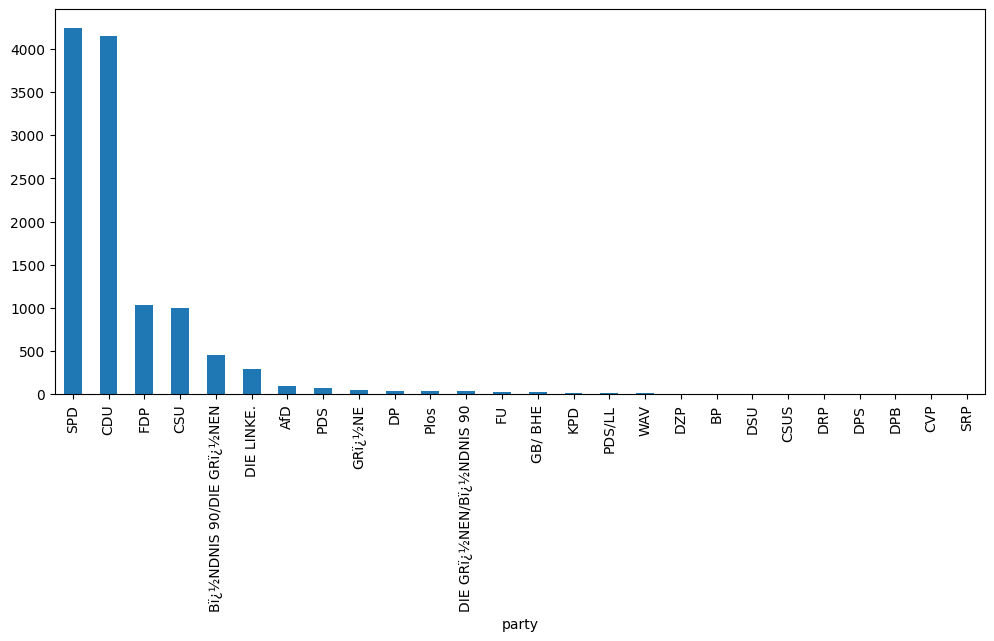

In [25]:
mdb_csv['party'].value_counts().plot(kind='bar', figsize=(12,5))

In [26]:
mdb_csv['faction'].value_counts()

faction
Fraktion der Christlich Demokratischen Union/Christlich - Sozialen Union          5089
Fraktion der Sozialdemokratischen Partei Deutschlands                             4244
Fraktion der Freien Demokratischen Partei                                         1052
Fraktion Bï¿½ndnis 90/Die Grï¿½nen                                                 419
Fraktion DIE LINKE.                                                                269
Fraktion Die Grï¿½nen                                                              103
Alternative fï¿½r Deutschland                                                       92
Gruppe der Partei des Demokratischen Sozialismus                                    55
Fraktion Deutsche Partei                                                            49
Fraktionslos                                                                        39
Fraktion der Partei des Demokratischen Sozialismus                                  39
Fraktion Gesamtdeutscher Block / Bl

<Axes: xlabel='faction'>

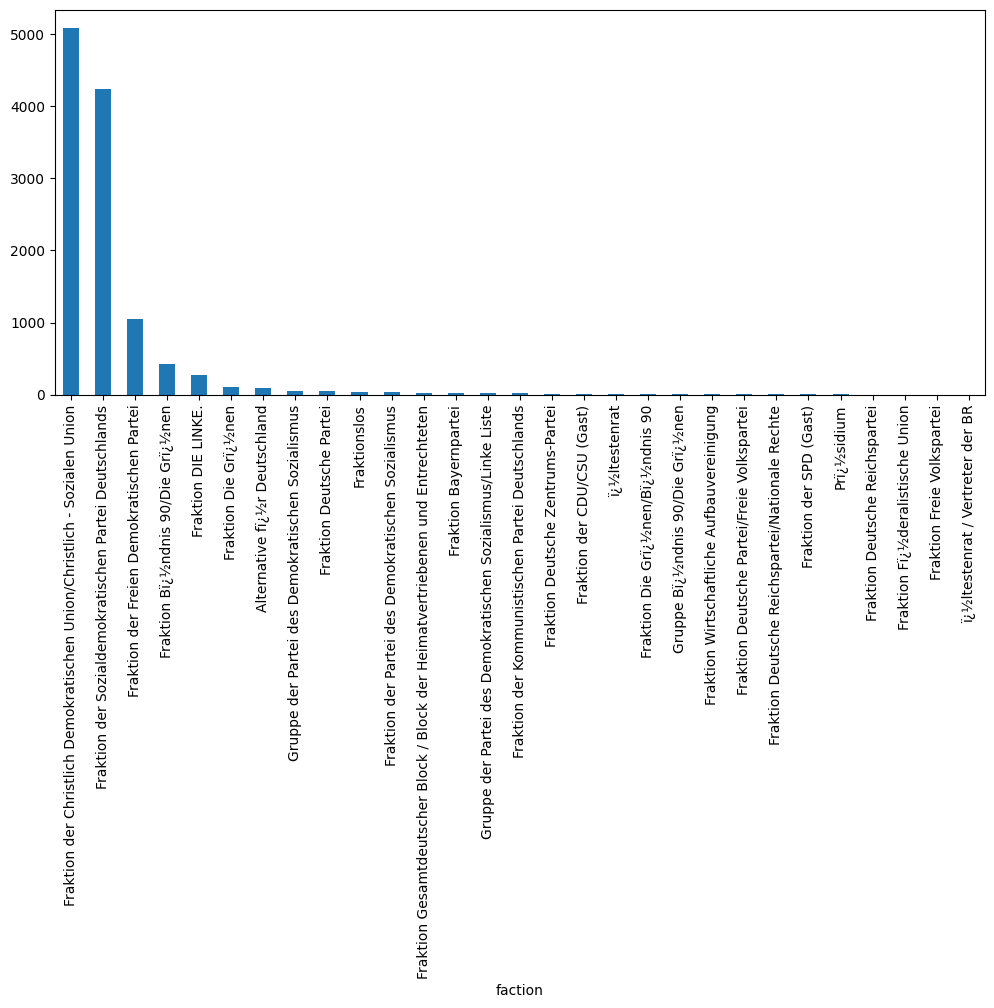

In [27]:
mdb_csv['faction'].value_counts().plot(kind='bar', figsize=(12,5))

Since for the `party` and `faction` value there are a lot of outliers, which will be difficult if not impossible to predict, the politial senitment of parties can be grouped closer together.

TODO:

<Axes: xlabel='elect_distr'>

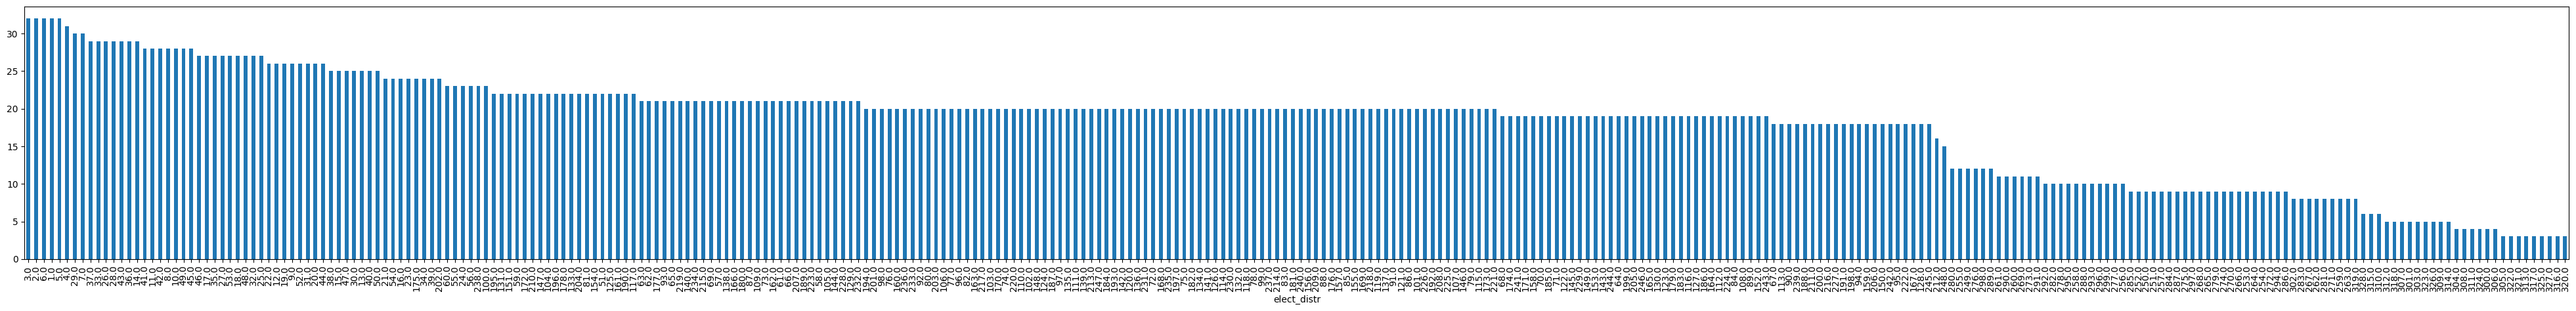

In [30]:
mdb_csv['elect_distr'].value_counts().plot(kind='bar', figsize=(50,5))


<Axes: xlabel='elect_distr'>

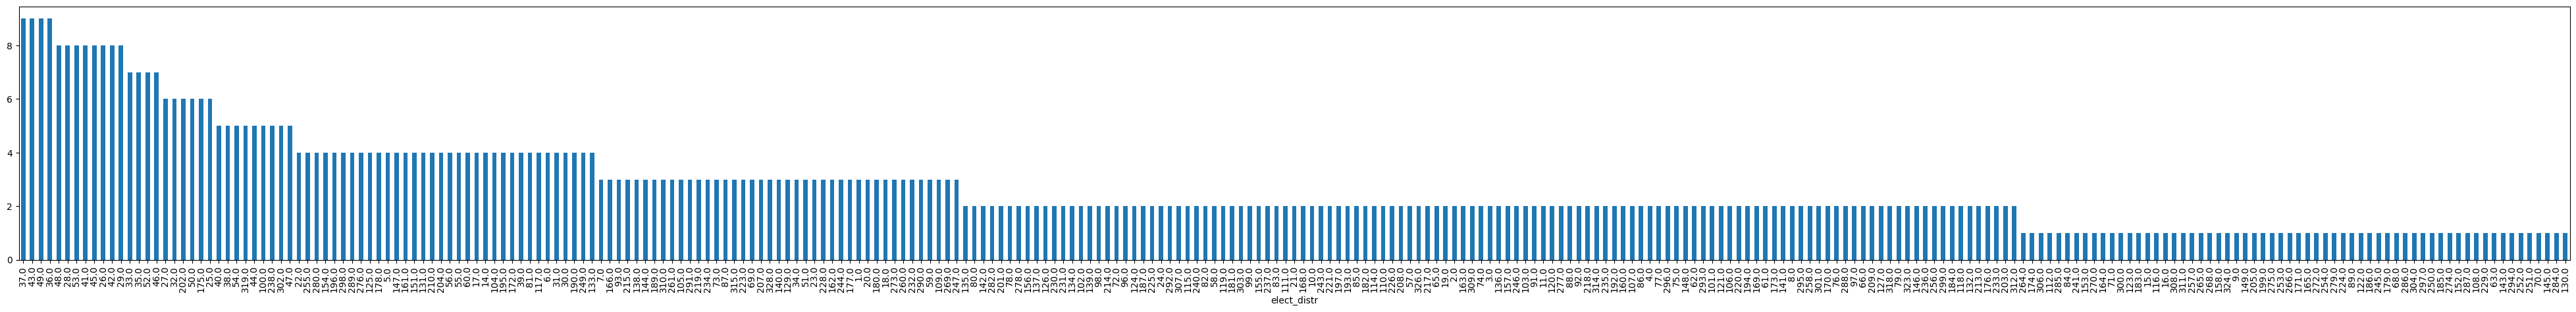

In [35]:
mdb_csv['mandate_type'].value_counts()
mdb_el_dist = mdb_csv[mdb_csv['mandate_type']=='Landesliste'].copy()
mdb_el_dist['elect_distr'].value_counts().plot(kind='bar', figsize=(50,5))

TODO: How do interpret the election district????

## 3) Train-Test-Split

## 4) Correlation between different attributes and the result attribute

## 5) Transform Data 
Fill missing numerical values, scale numerical values and transform categories in machine readable values via encoders

## 6) Regression

## 7) Classifier

## 8) Validation
Check the accuracy_score, the confusion_matrix, n-fold cross validation or similar methods

## 9) Fine Tuning

## 10) Evaluation